# TASK 1 - Regresión Lineal

##### LINK DE REPOSITORIO
https://github.com/FabianKel/LAB1-IA

### Responda a cada una de las siguientes preguntas de forma clara y de lo más completamente posible.

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y
w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación
del coeficiente 3w₂ en el contexto del modelo?

R// En el contexto del modelo, el coeficiente 3w₂ denota el peso que tiene la característica X₂ sobre la salida y. Dicho coeficiente refleja la importancia relativa de dicha característica sobre el modelo de regresión lineal. En el caso que el coeficiente junto a w₁ fuese mayor que el de w₂, entonces significaría que la característica X₁ tendría mayor efecto en la salida, indicando una mejor relación entre esa variable específica y la salida, luego de entrenar al modelo.

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

R// La multicolinealidad hace referencia a aquellas variables independientes (dos o más) que están correlacionadas. Esto puede ser un problema porque impide que pueda predecir los resultados de manera precisa, por lo que podría significar un sobreajuste en el modelo. En cuanto al efecto en la interpretación de los coeficientes, si la correlación es casi perfecta, no podría ser posible medir el efecto que tienen las variables sobre el modelo, puesto que los valores estarían relativamente cercanos entre sí.

### **Referencias**

Murel, J., & Kavlakoglu, E. (2023, 21 noviembre). Multicolinealidad. ¿Qué es la multicolinealidad? https://www.ibm.com/es-es/topics/multicollinearity

# TASK 2 - Exploración de datos

#### Importar librerías y Configurar Entorno

In [42]:
# Manipulación y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# Métrica de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Modificar máximo de columnas
pd.set_option('display.max_columns', None)


#### Importar el Dataset

In [73]:
data = pd.read_csv('dataset_phishing.csv')

### Exploración de datos

In [44]:
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [74]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

#### Verificar si hay datos duplicados

In [47]:
print(not data["url"].is_unique)

True


No hay urls duplicadas

#### Excluir Columnas innecesarias

Se excluirán las siguientes columnas:
- ```URL```: Ya hay columnas describiendo el contenido de las urls, por lo que esta columna es innecesaria
-  Por el momento se guardará la columna ```Status``` en ```Y``` para la métrica de desempeño.

In [75]:
X = data.iloc[:,1:-1]
X = X.values
Y = data.iloc[:,-1].values

print(X)
print(Y)

[[ 37.  19.   0. ...   1.   1.   4.]
 [ 77.  23.   1. ...   0.   1.   2.]
 [126.  50.   1. ...   0.   1.   0.]
 ...
 [105.  16.   1. ...   0.   1.  10.]
 [ 38.  30.   0. ...   0.   0.   4.]
 [477.  14.   1. ...   1.   1.   0.]]
['legitimate' 'phishing' 'phishing' ... 'legitimate' 'legitimate'
 'phishing']


#### Revisión de datos faltantes

In [76]:
pd.DataFrame(X).isnull().sum()


0     0
1     0
2     0
3     0
4     0
     ..
82    0
83    0
84    0
85    0
86    0
Length: 87, dtype: int64

No se encontraron datos faltantes

### División del dataset en conjuntos de entrenamiento y prueba

Se dividirán los datos de modo de que el 80% sea destinado para el **entreno** y el 20% para el **testing**.

Esto para evitar sesgos en la evaluación y que los datos de prueba no afecten el entrenamiento.

In [77]:
# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

print("Los datos se dividieron de la siguiente manera:")
print("- Entrenamiento:", X_train.shape)
print("- Prueba:", X_test.shape)


Los datos se dividieron de la siguiente manera:
- Entrenamiento: (9144, 87)
- Prueba: (2286, 87)


Ahora con los datos divididos correctamente, el siguiente paso es Escalar y Codificar variables

### Codificar Variables Categóricas

La única variable categórica que es necesario codificar es la de ```status```, la cuál puede tener un valor de ```phishing``` o ```legitimate```

In [78]:
print("Y_train antes de la codificación:", Y_train[:5])
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

print("Y_train después de la codificación:", Y_train[:5])
print("Clases codificadas:", label_encoder.classes_)

Y_train antes de la codificación: ['phishing' 'legitimate' 'legitimate' 'legitimate' 'legitimate']
Y_train después de la codificación: [1 0 0 0 0]
Clases codificadas: ['legitimate' 'phishing']


Ahora que las categorías **legitimate** y **phishing** se codificaron a **1** y **0**, se continuará con el escalado de variables.

### Escalado de Variables
Este escalado se aplica después de la división de datos para evitar que la información de los datos de prueba contamine el entrenamiento.
- Se escala para asegurar que todas las variables tengan la misma influencia en el futuro.

Primero se hará una inspección de los valores para determinar la mejor manera de escalar los datos de ser necesario.

In [79]:
X_train_df = pd.DataFrame(X_train, columns=data.columns[1:-1])
X_test_df = pd.DataFrame(X_test, columns=data.columns[1:-1])
X_train_df.describe()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.0,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.0,9144.000000,9144.0,9144.000000,9144.0,9144.000000,9144.000000,9144.000000,9144.000000,9144.0,9144.000000,9144.000000,9144.0,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9144.000000,9.144000e+03,9144.000000,9144.000000,9144.000000
mean,60.846238,21.063320,0.147310,2.483596,0.993438,0.022528,0.138561,0.159558,0.0,0.287183,0.319444,0.006343,0.118329,4.284339,0.000766,1.028434,0.003937,0.062227,0.001640,0.036199,0.451553,0.128828,0.006671,0.016951,0.610127,0.052178,0.024783,0.000328,0.002515,0.065617,0.048338,0.020013,2.233377,0.204834,0.083880,0.124453,0.000109,0.499891,0.003062,6.201990,2.906715,3.140201,5.008968,2.395232,15.372266,10.482612,10.500984,7.266703,7.679780,5.066113,0.324584,0.102800,0.003500,0.005031,0.017060,0.057852,87.780402,0.606515,0.275156,0.0,0.779418,0.0,0.159726,0.0,0.062165,0.062445,0.445757,52.351839,0.0,43.045988,23.423828,0.0,0.001312,0.006343,37.363254,0.001312,0.001640,0.122922,0.776575,0.442367,0.071085,491.915245,4073.397638,8.445066e+05,0.018810,0.526465,3.188867
std,55.024461,10.608823,0.354434,1.388597,2.069333,0.158385,0.362499,0.825083,0.0,0.997309,1.108166,0.079394,1.523593,1.899956,0.027659,0.243162,0.100234,0.569331,0.058206,0.397826,0.501833,0.382294,0.081408,0.173861,0.487748,0.088266,0.091948,0.018111,0.050092,0.247625,0.214491,0.140053,0.636831,0.403602,0.277223,0.330116,0.010458,0.696549,0.055255,5.599096,4.311270,2.256112,3.932066,3.026798,21.236121,4.963139,22.263513,4.127055,3.573905,7.135332,0.839566,0.303714,0.059057,0.070752,0.129503,0.326790,168.075199,0.373855,0.317102,0.0,2.728281,0.0,0.266697,0.0,0.155045,0.241976,0.497076,41.326801,0.0,46.240269,38.472794,0.0,0.036204,0.079394,39.010245,0.036204,0.040471,0.328366,0.416564,0.496694,0.256981,833.824922,3117.262222,1.980062e+06,0.135861,0.499326,2.529165
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

### Observaciones de los valores
- ```length_url``` tiene un valor máximo de 1641, lejano a la media de 60 caracteres por lo que puede tratarse de un valor atípico.
- Hay variables binarias que no se necesitan escalar, las cuales son: ```tdl_in_path```, ```http_in_path```, ```is_active```, ```has_error```, ```is_authenticated```

In [80]:
X_train_df['length_url'].nlargest(n=5)

6182    1641.0
6800    1386.0
7848    1386.0
6668     907.0
425      795.0
Name: length_url, dtype: float64

Se puede notar que el dato mayor de ```length_url``` no es un valor atípico, ya que hay varias urls con un largo cercano, por lo que se descarta esa idea.

Tras realizar una inspección detallada de los datos, se observó que algunas columnas presentan una amplia diferencia entre su valor máximo y su valor promedio (media). Estas disparidades pueden ocasionar problemas en los modelos de aprendizaje automático, ya que los atributos con valores más altos pueden dominar las métricas de distancia utilizadas por algunos algoritmos, afectando negativamente la interpretación y precisión de los resultados.

Por lo que se decidió escalar las siguientes columnas:
- ```length_url```
- ```length_hostname```
- ```length_words_raw```
- ```char_repeat```
- ```longest_word_path```
- ```avg_words_raw```
- ```domain_registration_length```
- ```domain_age```
- ```web_traffic```
- ```page_rank```

#### Método de escalado

Se decidió optar por el uso del ```StandardScaler```, que ajusta los datos para que cada columna tenga una media de **0** y una desviación estándar de **1**. Este método es útil cuando las columnas presentan diferentes unidades o rangos de valores, como ocurre en este caso.

El escalado se realizó ajustando el escalador únicamente con los datos de entrenamiento. Posteriormente, la transformación se aplicó tanto al conjunto de entrenamiento como al de prueba, utilizando las estadísticas calculadas en el primero. Esto evita el data leakage, asegurando que el modelo no tenga acceso a información del conjunto de prueba durante el proceso de entrenamiento.

In [81]:
sc_X = StandardScaler()
columns = ['length_url', 'length_hostname', 'length_words_raw', 'char_repeat', 'longest_word_path',
'avg_words_raw', 'domain_registration_length', 'domain_age', 'web_traffic', 'page_rank']
X_train_df[columns] = sc_X.fit_transform(X_train_df[columns])
X_test_df[columns] = sc_X.transform(X_test_df[columns])

#### Verificación tras escalado
Para verificar que el escalado se realizó de manera correcta, se debe de calcular la desviación estándar de cada columna y verificar que tanto las columnas de entrenamiento como las de prueba tengan una media muy cercana a 0 y desviación estándar muy cercana a 1.

In [83]:
print("Media:")
print(X_train_df[columns].mean())
print(X_test_df[columns].mean())
print("\nDesviación Estándar:")
print(X_train_df[columns].std())
print(X_test_df[columns].std())

Media:
length_url                    2.331177e-18
length_hostname               1.787236e-17
length_words_raw             -4.895472e-17
char_repeat                   2.875118e-17
longest_word_path             9.518973e-18
avg_words_raw                -4.901300e-15
domain_registration_length    6.993531e-18
domain_age                    9.130443e-17
web_traffic                  -8.547649e-18
page_rank                    -2.185478e-17
dtype: float64
length_url                    0.025485
length_hostname               0.012711
length_words_raw              0.027522
char_repeat                   0.024074
longest_word_path             0.013593
avg_words_raw                -0.009476
domain_registration_length    0.003700
domain_age                   -0.017410
web_traffic                   0.030935
page_rank                    -0.006184
dtype: float64

Desviación Estándar:
length_url                    1.000055
length_hostname               1.000055
length_words_raw              1.000055
char

Tras este paso, se puede confirmar que las columnas se escalaron de manera correcta.

### Métrica de desempeño elegida

Tomando en cuenta que los datos en el dataset están balanceados, consideramos que la métrica de desempeño adecuada a implementar en este caso es la de **accuracy**, puesto que permite que las clases sean representadas de la manera más equitativa posible. De esta manera, cada una contribuye proporcionalmente a la evaluación del modelo.

### Tras la exploración y separación de los datos, el dataset se divide de la siguiente manera:
- ```X_train_df``` : DF de entrenamiento con los datos escalados
- ```X_test_df```: DF de prueba con los datos escalados
- ```Y_train```: Status de url para entrenamiento
- ```Y_test```: Status de url para pruebas

# TASK 2.1 - Regresión Logística 


Para la regresión logística se utilizará el **accuracy** como medida del desempeño general del modelo, puesto que es útil para evaluar qué tan bien podrá predecir las etiquetas. Además, es una métrica directa para medir el porcentaje de predicciones correctas.

#### Implementación sin librerías

In [56]:
## Implemtación de la regresión logística sin librerías
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Inicializar parámetros
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Descenso de gradiente
        for _ in range(self.iterations):
            # Modelo lineal
            z = np.dot(X, self.weights) + self.bias
            sigmoid = self.sigmoid(z)

            # Calcular gradientes
            dw = (1 / m) * np.dot(X.T, (sigmoid - y))
            db = (1 / m) * np.sum(sigmoid - y)

            # Actualizar parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

In [57]:
X_train_np = X_train_df.values
X_test_np = X_test_df.values

def custom_logistic_regression(X_train_np, Y_train, X_test_np, Y_test):
    # Crear y entrenar modelo
    custom_model = CustomLogisticRegression(
        learning_rate=0.1, 
        iterations=1000
    )
    custom_model.fit(X_train_np, Y_train)
    
    # Predecir
    custom_predictions = custom_model.predict(X_test_np)
    
    # Evaluar
    print("Accuracy sin librerias:", custom_model.accuracy(X_test_np, Y_test))
    
    return custom_model, custom_predictions

In [58]:
custom_model, custom_preds = custom_logistic_regression(X_train_np, Y_train, X_test_np, Y_test)

Accuracy sin librerias: 0.8517060367454068


Para este modelo se tuvo que tomar en cuenta varias consideraciones para garantizar que el algortimo funcionara de la mejor manera posible:
 - La implementación de la función *sigmoid* se realizó de la manera más precisa posible para asegurar la correcta implementación de los cálculos, así como gestionar posbles errores numéricos como el desbordamiento en la función exponencial.
 - Se gestionaron los hiperparámetros *(tasa de aprendizaje y el número de iteraciones)* de manera manual para garantizar la convergencia.
 - Fue necesario implementar manualmente la métrica de desempeño elegida para evaluar el desempeño del modelo.

#### Implementación con librerías

In [59]:
# Implementación de la regresión logística con librerías
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [60]:
X_train_np = X_train_df.values
X_test_np = X_test_df.values

def sklearn_logistic_regression(X_train_np, Y_train, X_test_np, Y_test):
    
    # Crear y entrenar modelo
    sklearn_model = LogisticRegression(
        random_state=42, 
        max_iter=10000
    )
    sklearn_model.fit(X_train_np, Y_train)
    
    # Predecir
    sklearn_predictions = sklearn_model.predict(X_test_np)
    
    # Evaluar
    print("Accuracy con librerias:", accuracy_score(Y_test, sklearn_predictions))
    print("\nReporte de clasificación:\n", classification_report(Y_test, sklearn_predictions))
    
    return sklearn_model, sklearn_predictions

In [61]:
sklearn_model, sklearn_preds = sklearn_logistic_regression(X_train_np, Y_train, X_test_np, Y_test)

Accuracy con librerias: 0.9549431321084865

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1084
           1       0.97      0.95      0.96      1202

    accuracy                           0.95      2286
   macro avg       0.95      0.96      0.95      2286
weighted avg       0.96      0.95      0.95      2286



##### Gráfica de grupos encontrados

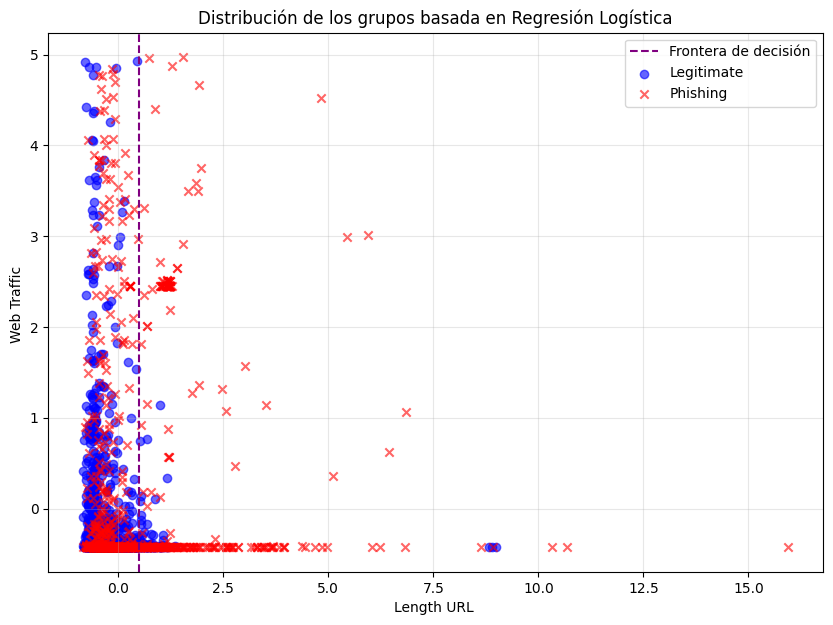

In [62]:
# Gráfica de grupos encontrados por la regresión logística
def plot_logistic_groups():
    # Datos para la visualización
    features = ['length_url', 'web_traffic']
    X_plot = X_test_df[features].values
    plt.figure(figsize=(10, 7))

    # Graficar frontera de decisión
    plt.axvline(0.5, color='purple', linestyle= '--', label='Frontera de decisión')

    # Graficar puntos para cada clase
    plt.scatter(X_plot[Y_test == 0, 0], X_plot[Y_test == 0, 1], c='blue', label='Legitimate', marker='o', alpha=0.6)
    plt.scatter(X_plot[Y_test == 1, 0], X_plot[Y_test == 1, 1], c='red', label='Phishing', marker='x', alpha=0.6)

    # Etiquetas y título
    plt.xlabel('Length URL ')
    plt.ylabel('Web Traffic ')
    plt.title('Distribución de los grupos basada en Regresión Logística')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
# Llamar a la función para mostrar la gráfica
plot_logistic_groups()



La gráfica muestra la distribución de las URLs legítimas (azul) y de phishing (rojo) basadas en las variables **Length URL** y **Web Traffic**, utilizando la regresión logística como modelo de clasificación. La frontera de decisión marca la separación entre ambas clases dentro del plano cartesiano. Claramente se puede observar que existe una mayor concentración de puntos en la región izquierda de la línea y separación entre ambas regiones, demostrando que el modelo logró diferenciar en gran parte entre ambas clases.

## ¿Qué implementación fue mejor? ¿Por qué?

Analizando los resultados, el uso de la librería sklearn fue la mejor ya que es el resultado que más se aproxima a 1, lo contrario del modelo sin líbrerias. Esto se debe a que el uso de la librerias optimiza, hace uso de algoritmos de optimización más sofisticados. También hay implementación numéricas más precisas, gestionando  mejor los casos extremos y las condiciones de los datos.


# TASK 2.2 - K-Nearest Neighbors

### Implementación sin librerías

In [63]:
# Función para calcular la distancia eucladiana entre dos puntos
def distancia_eucladiana(p1,p2):
    distancia = 0
    for i in range(len(p1)):
        distancia += (p1[i]-p2[i]) ** 2
    return distancia ** 0.5

In [64]:
# Función para obtener los k vecinos más cercanos de un punto de prueba
X_train_np = X_train_df.values

def obtener_k_vecinos(X_train_np, Y_train, punto_prueba, k):
    distancias = []
    for i in range(len(X_train_df.values)):
        distancia = distancia_eucladiana(punto_prueba, X_train_np[i])
        distancias.append((distancia, Y_train[i]))
    
    distancias_sorted = sorted(distancias, key = lambda x:x[0])
    k_vecinos = distancias_sorted[:k]

    return k_vecinos

In [65]:
# Función para clasificar un punto de prueba basado en los k vecinos más cercanos
def clasificar_punto(k_vecinos):
    contador = {}
    for vecino in k_vecinos:
        clase = vecino[1]
        if clase in contador:
            contador[clase] += 1
        else:
            contador[clase] = 1

    clase_mayoritaria = None
    max_frecuencia = 0
    for clase, frecuencia in contador.items():
        if frecuencia > max_frecuencia:
            max_frecuencia = frecuencia
            clase_mayoritaria = clase
            
    return clase_mayoritaria

In [66]:
# Función principal del algoritmo KNN
# Clasifica cada punto del conjunto de prueba basándose en los datos de entrenamiento y el valor de k
X_train_np = X_train_df.values
X_test_np = X_test_df.values

def knn(X_train_np, Y_train, X_test_np, k):
    predicciones = []
    for punto_prueba in X_test_np:
        k_vecinos = obtener_k_vecinos(X_train_np, Y_train, punto_prueba, k)
        clase = clasificar_punto(k_vecinos)
        predicciones.append(clase)

    return predicciones

In [67]:
# Función para calcular la precisión del modelo
def calcular_accuracy(y_real, y_pred):
    aciertos = 0
    for i in range(len(y_real)):
        if y_real[i] == y_pred[i]:
            aciertos += 1
    return aciertos / len(y_real)

In [68]:
# Calcula el accuracy del modelo con base al número de k establecido
k = 3
y_pred = knn(X_train_df.values, Y_train, X_test_df.values, k)
accuracy = calcular_accuracy(Y_test, y_pred)
print(f"Accuracy del modelo: {accuracy * 100:.2f}%")

Accuracy del modelo: 86.92%


Para este modelo se tuvo que tomar en cuenta varias consideraciones para garantizar que el algortimo funcionara de la mejor manera posible:
 - La implementación de la función *distancia_eucladiana* se realizó de la manera más precisa posible para asegurar la correcta implementación de los cálculos de las distancias entre los puntos. Por esto mismo y el hecho de que no se utilizó ningún tipo de librería, computacionalmente es algo costoso.
 - Se gestiono el hiperparámetro *(k)* de manera manual para observar cómo su valor afectaba a los resultados
 - Fue necesario implementar manualmente la métrica de desempeño elegida para evaluar el desempeño del modelo.

### Implementación con librerías

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3  
knn_model = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
knn_model.fit(X_train_df.values, Y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_df.values)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy del modelo: {accuracy * 100:.2f}%")

Accuracy del modelo: 86.92%


## Grupos encontrados


length_url
web_traffic


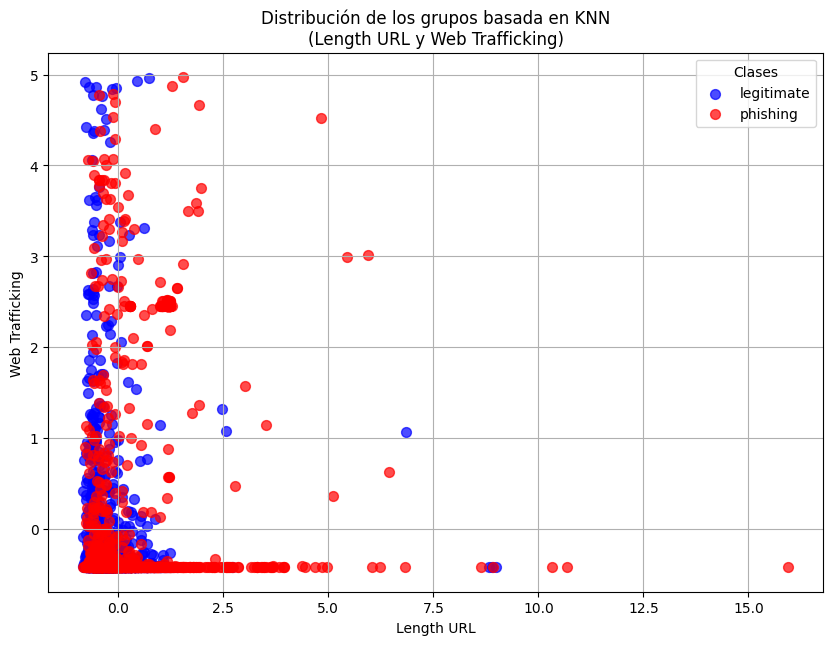

In [70]:
import matplotlib.pyplot as plt

# Mapear las clases a sus etiquetas
clases = {0: 'legitimate', 1: 'phishing'}

print(data.columns[1:-1][0])  
print(data.columns[1:-1][83])  

grafico_df = pd.DataFrame({
    'x': X_test_df.iloc[:, 0],  
    'y': X_test_df.iloc[:, 83],  
    'real': Y_test,
    'pred': y_pred
})

# Colores según clases codificadas
colores = {'legitimate': 'blue', 'phishing': 'red'}

# Crear el gráfico
plt.figure(figsize=(10, 7))
for clase, color in colores.items():
    subset = grafico_df[grafico_df['pred'] == list(clases.keys())[list(clases.values()).index(clase)]]
    plt.scatter(subset['x'], subset['y'], label=clase, alpha=0.7, color=color, s=50)

plt.title('Distribución de los grupos basada en KNN\n(Length URL y Web Trafficking)')
plt.xlabel('Length URL')
plt.ylabel('Web Trafficking')
plt.legend(title='Clases')
plt.grid()
plt.show()



## ¿Cuál implementación fue mejor? ¿Por qué?

Ambas implementaciones del algoritmo KNN, tanto manual como utilizando scikit-learn, alcanzaron una precisión final del 86.92%. Esto demuestra que ambas versiones producen resultados consistentes al clasificar los datos. Sin embargo, hay diferencias importantes entre ellas. La implementación manual es menos eficiente y adecuada para conjuntos de datos grandes debido al alto costo computacional asociado con los cálculos de distancias y la búsqueda de vecinos más cercanos. Además, el código manual es más propenso a errores y requiere más tiempo para su desarrollo y depuración. Por otro lado, la implementación con scikit-learn es mucho más eficiente y fácil de usar, ya que aprovecha optimizaciones internas y estructuras avanzadas, lo que permite manejar datos más grandes de manera eficiente. Aunque ambas versiones alcanzaron la misma precisión, la implementación con scikit-learn es preferible para proyectos reales debido a su eficiencia, simplicidad y escalabilidad, mientras que la implementación manual es valiosa como herramienta de aprendizaje.